<a href="https://colab.research.google.com/github/mohammadzainabbas/nutri-score/blob/main/notebooks/Q6_NutriScore_MachineLearningCassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mohammadzainabbas/nutri-score.git

Cloning into 'nutri-score'...
remote: Enumerating objects: 1090, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 1090 (delta 99), reused 164 (delta 87), pack-reused 828
Receiving objects: 100% (1090/1090), 9.14 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (555/555), done.


In [2]:
!pip install dtreeviz
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 347 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# import the products data

In [3]:
import pandas as pd
import numpy as np

import math


from sklearn.metrics import accuracy_score

    
class Read_Data():
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.cols = ['id', 'name', 'category', 'en', 'su', 'fa', 'sa', 'pr', 'fi', 'fr', 'grade']
        self.init_cols = ['id', 'name', 'categories', 'energy', 'sugars' ,'saturated-fat','salt', 'proteins',
        'fiber','fruits-vegetables-nuts-estimate-from-ingredients_100g','grade']
    
    def getCols(self):
        self.data = self.data.loc[:, self.init_cols].copy()
        self.data.columns = self.cols
    
    def setNans(self):
        self.data.dropna(inplace=True)
    
    def setNegValues(self):
        self.data.en = self.data.en * -1
        self.data.su = self.data.su * -1
        self.data.fa = self.data.fa * -1
        self.data.sa = self.data.sa * -1
    
    def getData(self):
        self.getCols()
        self.setNans()
        self.setNegValues()
        
        return self.data

    
# pass the data directory to Read_Data class
rd = Read_Data("/content/nutri-score/data/products.csv")

# call the getData() to return dataframe
df = rd.getData()
df

,id,name,category,en,su,fa,sa,pr,fi,fr,grade
1,5411188134985,"Not Milk 3,5 %","Pflanzliche Lebensmittel und Getränke, Getränk...",-247.0,-0.00,-0.400000,-0.120000,0.70,1.0,0.000000,a
2,5411188135005,Not Milk Fettarm,"Plant-based foods and beverages, Beverages, Pl...",-184.0,-0.00,-0.200000,-0.120000,0.70,1.0,0.000000,a
3,8003231013322,Gallette di mais biologiche,"Cibi e bevande a base vegetale, Cibi a base ve...",-1582.0,-0.50,-0.100000,-1.000000,6.60,3.8,0.000000,b
6,3256220881111,Ananas en morceaux au jus d'ananas Bio,"Aliments et boissons à base de végétaux, Alime...",-271.0,-15.00,-0.100000,-0.010000,0.60,0.7,50.000000,b
7,5400141049657,Oignons doux 1kg,"Aliments et boissons à base de végétaux,Alimen...",-159.0,-5.35,-0.044300,-0.098280,1.25,2.8,100.000000,a
...,...,...,...,...,...,...,...,...,...,...,...
1994,9100000967929,Erdbeer konfitüre,hr:en:Strawberry jams,-963.0,-54.00,-0.100000,-0.010000,0.50,1.8,0.000000,d
1995,3280220907137,Ma petite salade Laitue,"Aliments et boissons à base de végétaux, Alime...",-73.0,-1.40,-0.200000,-0.000000,1.00,1.9,100.000000,a
1996,3580282266037,Soupe Lentille corail au curry et lait de coco,"Aliments et boissons à base de végétaux, Alime...",-222.0,-1.00,-0.900000,-0.600000,2.10,0.0,108.000000,a
1997,0077890122242,Italian classics marinated quartered artichokes,"Plant-based foods and beverages, Plant-based f...",-374.0,-0.00,-1.785714,-1.696429,0.00,0.0,14.285714,c


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["a", "b", "c", "d", "e"])
y_train=le.transform(df[['grade']])
#y_train=df.iloc[:,10]
X_train=df.iloc[:,3:10]

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# classification scoring function
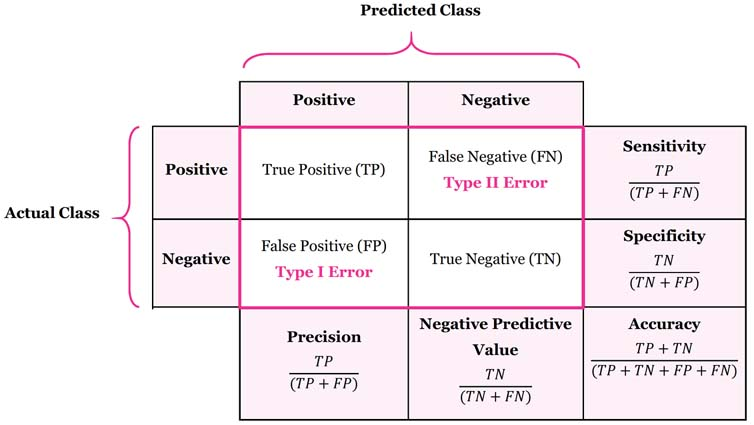

NOTE: Our case is a multi-class classification problem instead of a binary one. Here are the sklearn metrics we use to measure the classification performance:


**metrics.confusion_matrix**

C_ij is equal to the number of observations known to be in group i and predicted to be in group j.

**metrics.accuracy_score**

In multi-class classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true, and normalizes the score ot a percentage.

**metrics.precision_score**

For multi-class problem, we should choose to average the precision. We have the choices of average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’. 

Here we use the precision_score(y_test, y_pred, average=**'micro'**) will return the total ratio of tp/(tp + fp) of all classes.

**metrics.f1_score**

F1 = 2 * (precision * recall) / (precision + recall)

Again, here we use average{‘micro’} to compute the f1_score for multi-class problem. 

**metrics.recall_score**

Known as sensitivity metrics as well, here we use average{‘micro’} to compute the recall for multi-class problem. 
metrics.recall_score

**metrics.jaccard_score**

Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,  recall_score,f1_score,jaccard_score
def classificationScoring(y_train,y_pred_en):
  print('the confusion_matrix is : ')
  print(confusion_matrix(y_train,y_pred_en))
  print('the accuracy_score is : ')
  print(accuracy_score(y_train,y_pred_en))
  print('the precision_score is : ')
  print(precision_score(y_train,y_pred_en,average='macro'))
  print('the recall_score is : ')
  print(recall_score(y_train,y_pred_en,average='macro'))
  print('the f1_score is : ')
  print(f1_score(y_train,y_pred_en,average='macro'))
  print('the jaccard_score is : ')
  print(jaccard_score(y_train,y_pred_en,average='macro'))

# pair-wise vector similarity
Another way to compare the result similarity, is to treat them as two vectors, y_train and y_predict. And compare the similarity of the two vectors.

**sklearn.metrics.pairwise.cosine_similarity**

Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y.

**scipy.stats.pearsonr**

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

def vectorSimilarity(y_train,y_pred_en):
  print('the cosine similarity of y_train and y_predict is : ')
  print(float(cosine_similarity([y_train],[y_pred_en])))
  print('the pearsonr correlation coefficient of y_train and y_predict is : ')
  print(pearsonr(y_train,y_pred_en)[0])

# decision tree

The accuracy_score returns the fraction of correctly classified samples (float).

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_train)
classificationScoring(y_train, y_pred_en)
vectorSimilarity(y_train, y_pred_en)

the confusion_matrix is : 
[[635  28   0   0   0]
 [ 51 275  17   0   0]
 [  5  28 190   3   0]
 [  0   1   1  55   0]
 [  0   0   0   0  11]]
the accuracy_score is : 
0.8969230769230769
the precision_score is : 
0.9218017370760936
the recall_score is : 
0.9130274477828311
the f1_score is : 
0.9169748372169746
the jaccard_score is : 
0.8532052524377359
the cosine similarity of y_train and y_predict is : 
0.9601612036408446
the pearsonr correlation coefficient of y_train and y_predict is : 
0.9344366135400924


## visualize decision tree

using the package dtreeviz

In [8]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import dtreeviz
import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz.trees import *
from sklearn import tree

In [9]:
random_state = 1234
features=['en',	'su',	'fa',	'sa',	'pr',	'fi',	'fr']
target=	'grade'
df["grade"] = df.grade.astype("category").cat.codes

### predict the node label

In [30]:
X = df[features].iloc[10]
X

en   -1674.0
su     -21.0
fa      -0.9
sa      -0.1
pr      10.0
fi       7.4
fr       0.0
Name: 15, dtype: float64

In [31]:
df[target].iloc[10]

0

In [33]:
clas = tree.DecisionTreeClassifier(max_depth=7)  

clas.fit(df[features], df[target])

viz = dtreeviz(clas, 
               df[features],
               df[target],
               target_name='grade',
               feature_names=features, 
               class_names=['a','b','c','d','e'],
                # orientation='LR',
               X=X,
               show_node_labels = True)
viz

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


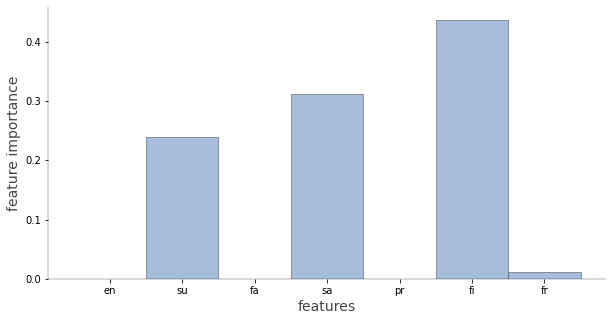

In [29]:
from dtreeviz import trees
random_state = 1234
tree_classifier = DecisionTreeClassifier(max_depth=7, random_state=random_state)
tree_classifier.fit(df[features], df[target])
sk_dtree = ShadowSKDTree(tree_classifier, df[features], df[target], features, target, [0, 1])
# trees.explain_prediction_path(tree_classifier, X, feature_names=features)
trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="sklearn_default")

# random forest

The accuracy_score returns the fraction of correctly classified samples (float).

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train, y_train)
y_pred_en=clf.predict(X_train)
classificationScoring(y_train, y_pred_en)
vectorSimilarity(y_train, y_pred_en)

the confusion_matrix is : 
[[649  14   0   0   0]
 [ 18 316   9   0   0]
 [  2  15 207   2   0]
 [  0   1   5  51   0]
 [  0   0   1   0  10]]
the accuracy_score is : 
0.9484615384615385
the precision_score is : 
0.9556192029690909
the recall_score is : 
0.9239847229613234
the f1_score is : 
0.9391013409645484
the jaccard_score is : 
0.8859646912998654
the cosine similarity of y_train and y_predict is : 
0.9793915163800685
the pearsonr correlation coefficient of y_train and y_predict is : 
0.9654464941134429


# Naive Bayes

Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. 

In [18]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred_en=nb.predict(X_train)
classificationScoring(y_train, y_pred_en)
vectorSimilarity(y_train, y_pred_en)

the confusion_matrix is : 
[[585  75   3   0   0]
 [149 176  11   2   5]
 [  8 143  41  19  15]
 [  0   4   5  41   7]
 [  0   0   1   0  10]]
the accuracy_score is : 
0.6561538461538462
the precision_score is : 
0.5668624998344648
the recall_score is : 
0.6410555117225303
the f1_score is : 
0.5398461068695636
the jaccard_score is : 
0.39607692919392734
the cosine similarity of y_train and y_predict is : 
0.8434406066725797
the pearsonr correlation coefficient of y_train and y_predict is : 
0.7623032237161443




```
# This is formatted as code
```

# K-Nearest Neighbours

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_en=knn.predict(X_train)
classificationScoring(y_train, y_pred_en)
vectorSimilarity(y_train, y_pred_en)

the confusion_matrix is : 
[[663   0   0   0   0]
 [118 225   0   0   0]
 [ 60  70  96   0   0]
 [  2  15  10  30   0]
 [  1   0   2   0   8]]
the accuracy_score is : 
0.7861538461538462
the precision_score is : 
0.8800480728396949
the recall_score is : 
0.6668687908386396
the f1_score is : 
0.735126333887596
the jaccard_score is : 
0.5936391639120696
the cosine similarity of y_train and y_predict is : 
0.8535208829528741
the pearsonr correlation coefficient of y_train and y_predict is : 
0.7883193081240492
